# Multipurpose Fermentation Plant



## Problem Statement

A few months ago you were given process development responsibilities for a start-up company that is attempting to commercialize a novel fermentation technology.  The fermentation produces high-value medicinal products based on an engineered micro-organism. 

During you short time on the job, you have already developed and commissioned a pilot plant comprised of the following basic operations:


Enzymatic digestion of the fermentation substrate.  This operation requires a feed of 20% substrate (S), 79% water (W), and 1% enzyme (E). The digestion requires 1 working day to complete all steps. Assume the substrate costs $2/kg, the enzyme is $20/kg, and water is essentially free.  You acquired a mixer/blender unit for this purpose that can operate on any quantity up to 100 kg.  The product of the digestion operation is called the “wort”. To avoid contamination of the process, wort cannot be stored before use.  
Digestion is followed by fermentation. The fermentation requires four working day for completion upon which the substrate is entirely consumed.  For this operation, you purchased a 100 liter (kg) fermentor that is working quite well. The product is an unseparated turbid suspension that is 20% solids.
A batch filtration operation separate the turbid suspension into a clarified intermediate product called “beer” (80%)  and a solid by-product (20%)  that can be sold for $2/kg.  The filtration device you purchased can handle 100 kg/batch. But the operation has turned out to be messy with frequent equipment breakdown. For planning purposes, you can plan on both products to be ready in 1 working day, but need to plan for additional working day for cleanup and maintenance of the equipment.
Following coarse filtration, a novel selective membrane separator is used to separate the beer into a product (P) valued at $200/kg and a contaminated waste-water stream that costs $2/kg to dispose. The product recovery is 5 mass % of the incoming liquid. The membrane separator was designed to handle 100 kg/day.

Assignment Part I. (You can do this part by hand.  Due 9/22)

Create a State-Task Network describing the pilot plant operation as it exists today.  
What is the minimum time needed to produce the first batch of product? Sketch a Gantt chart to illustrate your analysis.
Does the process generate a profit or loss?  How much per batch?
What is the minimum cycle time for the process? Sketch a Gantt chart to show your reasoning. 
Where is the bottleneck in this process?  What piece of equipment would recommend? How big does it need to be to completely remove the bottleneck? Show the results in form of a Gantt chart.

Assignment Part II. (Use the Python/Pyomo model to solve this part, Due 9/29.)

Life is turning out pretty well for this start-up company.  

The good news is that that pilot plant has convinced customers of the value of your product.  Furthermore, the R&D team has come up with a second organism that produces an even more valuable product valued at $500/kg, but otherwise follows the same recipe and can use the same equipment provided you add one day of cleanup after any use of the fermentors.  Because the market is uncertain, the company wants to hedge risk by producing equal amounts of both products for continued customer testing.

The small piece of bad news is that wastewater treatment charges have gone up to $8/kg which seriously cuts into the process economics. You could, however, address this issue with a batch water treatment device which can recycle 50% of the water for reuse.

Given these changes, you have now been authorized to purchase additional equipment for the pilot plant. You decide to add an additional fermentor which can be any size needed, to add an additional 100 kg coarse filtration device that doesn’t require the extra day of cleanup and maintenance after use, and a new water treatment unit with a capacity of 200 kg/day.

Create a new State-Task Network diagram that includes production of the second fermentation product and provides for waste-water recycle. 
Determine a size for additional fermentor that avoids bottlenecking the operation.  How much profit can be expected in 14 days of operation?
Would it be beneficial to add a third fermentor?

 


## Encoding the STN data

The basic data structure specifies the states, tasks, and units comprising a state-task network. The intention is for all relevant problem data to be contained in a single JSON-like structure.

In [ ]:
H = 14

Part1 = {
    'TIME':  range(0,H+1),
    'STATES': {
        'Enzyme'    : {'capacity':  500, 'initial': 500, 'price':  20},
        'Substrate' : {'capacity':  500, 'initial': 500, 'price':   2},
        'Water'     : {'capacity':  500, 'initial': 500, 'price':   0},
        'Wort'      : {'capacity':    0, 'initial':   0, 'price':   0},
        'TurbidS'   : {'capacity':  100, 'initial':   0, 'price':   0},
        'Beer'      : {'capacity':  100, 'initial':   0, 'price':   0},
        'SBP'       : {'capacity':  500, 'initial':   0, 'price':   2},
        'Product'   : {'capacity':  500, 'initial':   0, 'price': 200},
        'WasteW'    : {'capacity':  500, 'initial':   0, 'price':  -2},
    },
    'ST_ARCS': {
        ('Enzyme',    'Digestion'   ): {'rho': 0.01},
        ('Substrate', 'Digestion'   ): {'rho': 0.20},
        ('Water',     'Digestion'   ): {'rho': 0.79},
        ('Wort',      'Fermentation'): {'rho': 1.00},
        ('TurbidS',   'Filtration'  ): {'rho': 1.00},
        ('Beer',      'Separation'  ): {'rho': 1.00},
    },
    'TS_ARCS': {
        ('Digestion',    'Wort')    : {'dur': 1, 'rho': 1.0},
        ('Fermentation', 'TurbidS') : {'dur': 4, 'rho': 1.0},
        ('Filtration',   'Beer')    : {'dur': 1, 'rho': 0.8},
        ('Filtration',   'SBP')     : {'dur': 1, 'rho': 0.2},
        ('Separation',   'Product') : {'dur': 1, 'rho': 0.05},
        ('Separation',   'WasteW')  : {'dur': 1, 'rho': 0.95},
    },
    'UNIT_TASKS': {
        ('Blender',    'Digestion') : {'Bmin': 0, 'Bmax': 100, 'Cost': 1, 'vCost': 0, 'Tclean': 0},
        ('Fermentor',  'Fermentation'): {'Bmin': 0, 'Bmax': 100, 'Cost': 1, 'vCost': 0, 'Tclean': 0},
        ('Filter',     'Filtration') : {'Bmin': 0, 'Bmax': 100, 'Cost': 1, 'vCost': 0, 'Tclean': 1},
        ('MembraneS',  'Separation') : {'Bmin': 0, 'Bmax': 100, 'Cost': 1, 'vCost': 0, 'Tclean': 0},
    },
}

In [419]:
H = 14

Part2 = {
    'TIME':  range(0,H+1),
    'STATES': {
        'Enzyme'    : {'capacity':  500, 'initial': 500, 'price':  20},
        'Substrate' : {'capacity':  500, 'initial': 500, 'price':   2},
        'Water'     : {'capacity':  500, 'initial': 500, 'price':   0},
        'Wort'      : {'capacity':    0, 'initial':   0, 'price':   0},
        'TurbidS_1'   : {'capacity':  100, 'initial':   0, 'price':   0},
        'Beer_1'      : {'capacity':  100, 'initial':   0, 'price':   0},
        'SBP'       : {'capacity':  500, 'initial':   0, 'price':   2},
        'Product_1'   : {'capacity':  500, 'initial':   0, 'price': 200},
        'TurbidS_2'   : {'capacity':  100, 'initial':   0, 'price':   0},
        'Beer_2'      : {'capacity':  100, 'initial':   0, 'price':   0},
        'Product_2'   : {'capacity':  500, 'initial':   0, 'price': 500},
        'RawWasteW' : {'capacity':  500, 'initial':   0, 'price':  -8},
        'WasteWater': {'capacity':  500, 'initial':   0, 'price':  -8},
    },
    'ST_ARCS': {
        ('Enzyme',    'Digestion'   ): {'rho': 0.01},
        ('Substrate', 'Digestion'   ): {'rho': 0.20},
        ('Water',     'Digestion'   ): {'rho': 0.79},
        ('Wort',      'Fermentation_1'): {'rho': 1.00},
        ('TurbidS_1',   'Filtration_1'  ): {'rho': 1.00},
        ('Beer_1',      'Separation_1'  ): {'rho': 1.00},
        ('Wort',      'Fermentation_2'): {'rho': 1.00},
        ('TurbidS_2',   'Filtration_2'  ): {'rho': 1.00},
        ('Beer_2',      'Separation_2'  ): {'rho': 1.00},
        ('RawWasteW', 'WaterTreat')  : {'rho': 1.00},
    },
    'TS_ARCS': {
        ('Digestion',    'Wort')       : {'dur': 1, 'rho': 1.0},
        ('Fermentation_1', 'TurbidS_1')    : {'dur': 4, 'rho': 1.0},
        ('Filtration_1',   'Beer_1')       : {'dur': 1, 'rho': 0.8},
        ('Filtration_1',   'SBP')        : {'dur': 1, 'rho': 0.2},
        ('Separation_1',   'Product_1')    : {'dur': 1, 'rho': 0.05},
        ('Separation_1',   'RawWasteW')  : {'dur': 1, 'rho': 0.95},
        ('Fermentation_2', 'TurbidS_2')    : {'dur': 4, 'rho': 1.0},
        ('Filtration_2',   'Beer_2')       : {'dur': 1, 'rho': 0.8},
        ('Filtration_2',   'SBP')        : {'dur': 1, 'rho': 0.2},
        ('Separation_2',   'Product_2')    : {'dur': 1, 'rho': 0.05},
        ('Separation_2',   'RawWasteW')  : {'dur': 1, 'rho': 0.95},
        ('WaterTreat',   'Water')      : {'dur': 1, 'rho': 0.50},
        ('WaterTreat',   'WasteWater') : {'dur': 1, 'rho': 0.50},
    },
    'UNIT_TASKS': {
        ('Blender',    'Digestion') : {'Bmin': 0, 'Bmax': 100, 'Cost': 1, 'vCost': 0, 'Tclean': 0},
        ('Fermentor_1',  'Fermentation_1'): {'Bmin': 0, 'Bmax': 100, 'Cost': 1, 'vCost': 0, 'Tclean': 1},
        ('Fermentor_2',  'Fermentation_1'): {'Bmin': 0, 'Bmax': 100, 'Cost': 1, 'vCost': 0, 'Tclean': 1},
        ('Fermentor_3',  'Fermentation_1'): {'Bmin': 0, 'Bmax': 100, 'Cost': 1, 'vCost': 0, 'Tclean': 1},
        ('Filter_1',    'Filtration_1') : {'Bmin': 0, 'Bmax': 100, 'Cost': 1, 'vCost': 0, 'Tclean': 1},
        ('Filter_2',    'Filtration_1') : {'Bmin': 0, 'Bmax': 100, 'Cost': 1, 'vCost': 0, 'Tclean': 0},
        ('MembraneS',  'Separation_1') : {'Bmin': 0, 'Bmax': 100, 'Cost': 1, 'vCost': 0, 'Tclean': 0},
        ('Fermentor_1',  'Fermentation_2'): {'Bmin': 0, 'Bmax': 100, 'Cost': 1, 'vCost': 0, 'Tclean': 1},
        ('Fermentor_2',  'Fermentation_2'): {'Bmin': 0, 'Bmax': 100, 'Cost': 1, 'vCost': 0, 'Tclean': 1},
        ('Fermentor_3',  'Fermentation_2'): {'Bmin': 0, 'Bmax': 100, 'Cost': 1, 'vCost': 0, 'Tclean': 1},
        ('Filter_1',    'Filtration_2') : {'Bmin': 0, 'Bmax': 100, 'Cost': 1, 'vCost': 0, 'Tclean': 1},
        ('Filter_2',    'Filtration_2') : {'Bmin': 0, 'Bmax': 100, 'Cost': 1, 'vCost': 0, 'Tclean': 0},
        ('MembraneS',  'Separation_2') : {'Bmin': 0, 'Bmax': 100, 'Cost': 1, 'vCost': 0, 'Tclean': 0},
        ('RO_System',  'WaterTreat') : {'Bmin': 0, 'Bmax': 200, 'Cost': 1, 'vCost': 0, 'Tclean': 0},
    },
}

### Characterization of Tasks

In [420]:
STN = Part2

STATES = STN['STATES']
ST_ARCS = STN['ST_ARCS']
TS_ARCS = STN['TS_ARCS']
UNIT_TASKS = STN['UNIT_TASKS']
TIME = STN['TIME']
H = max(TIME)

In [421]:
TASKS = set([i for (j,i) in UNIT_TASKS])                         # set of all tasks 

S = {i: set() for i in TASKS}                                    # S[i] input set of states which feed task i
for (s,i) in ST_ARCS:
    S[i].add(s)

S_ = {i: set() for i in TASKS}                                   # S_[i] output set of states fed by task i
for (i,s) in TS_ARCS:
    S_[i].add(s)

rho = {(i,s): ST_ARCS[(s,i)]['rho'] for (s,i) in ST_ARCS}        # rho[(i,s)] input fraction of task i from state s

rho_ = {(i,s): TS_ARCS[(i,s)]['rho'] for (i,s) in TS_ARCS}       # rho_[(i,s)] output fraction of task i to state s

P = {(i,s): TS_ARCS[(i,s)]['dur'] for (i,s) in TS_ARCS}          # P[(i,s)] time for task i output to state s   

p = {i: max([P[(i,s)] for s in S_[i]]) for i in TASKS}           # p[i] completion time for task i

K = {i: set() for i in TASKS}                                    # K[i] set of units capable of task i
for (j,i) in UNIT_TASKS:
    K[i].add(j) 

### Characterization of States

In [422]:
T = {s: set() for s in STATES}                                   # T[s] set of tasks receiving material from state s 
for (s,i) in ST_ARCS:
    T[s].add(i)

T_ = {s: set() for s in STATES}                                  # set of tasks producing material for state s
for (i,s) in TS_ARCS:
    T_[s].add(i)

C = {s: STATES[s]['capacity'] for s in STATES}                   # C[s] storage capacity for state s

### Characterization of Units

In [423]:
UNITS = set([j for (j,i) in UNIT_TASKS])

I = {j: set() for j in UNITS}                                     # I[j] set of tasks performed with unit j
for (j,i) in UNIT_TASKS:
    I[j].add(i)

Bmax = {(i,j):UNIT_TASKS[(j,i)]['Bmax'] for (j,i) in UNIT_TASKS}  # Bmax[(i,j)] maximum capacity of unit j for task i
Bmin = {(i,j):UNIT_TASKS[(j,i)]['Bmin'] for (j,i) in UNIT_TASKS}  # Bmin[(i,j)] minimum capacity of unit j for task i

### Pyomo Model

In [424]:
from pyomo.environ import *
import numpy as np

TIME = np.array(TIME)

model = ConcreteModel()

model.W = Var(TASKS, UNITS, TIME, domain=Boolean)             # W[i,j,t] 1 if task i starts in unit j at time t
model.B = Var(TASKS, UNITS, TIME, domain=NonNegativeReals)    # B[i,j,t,] size of batch assigned to task i in unit j at time t
model.S = Var(STATES.keys(), TIME, domain=NonNegativeReals)   # S[s,t] inventory of state s at time t
model.Q = Var(UNITS, TIME, domain=NonNegativeReals)           # Q[j,t] inventory of unit j at time t
model.Cost = Var(domain=NonNegativeReals)
model.Value = Var(domain=NonNegativeReals)

# Objective is to maximize the value of the final state (see Kondili, Sec. 5)
model.Obj = Objective(expr = model.Value - model.Cost, sense = maximize)

# Constraints
model.cons = ConstraintList()
model.cons.add(model.Value == sum([STATES[s]['price']*model.S[s,H] for s in STATES]))
model.cons.add(model.Cost == sum([UNIT_TASKS[(j,i)]['Cost']*model.W[i,j,t] +
        UNIT_TASKS[(j,i)]['vCost']*model.B[i,j,t] for i in TASKS for j in K[i] for t in TIME])) 

# unit constraints
for j in UNITS:
    rhs = 0
    for t in TIME:
        # a unit can only be allocated to one task 
        lhs = 0
        for i in I[j]:
            for tprime in TIME:
                if tprime >= (t-p[i]+1-UNIT_TASKS[(j,i)]['Tclean']) and tprime <= t:
                    lhs += model.W[i,j,tprime]
        model.cons.add(lhs <= 1)

        # capacity constraints (see Konkili, Sec. 3.1.2)
        for i in I[j]:
            model.cons.add(model.W[i,j,t]*Bmin[i,j] <= model.B[i,j,t])
            model.cons.add(model.B[i,j,t] <= model.W[i,j,t]*Bmax[i,j])

        # unit mass balance
        rhs += sum([model.B[i,j,t] for i in I[j]])
        for i in I[j]:
            for s in S_[i]:
                if t >= P[(i,s)]:
                    rhs -= rho_[(i,s)]*model.B[i,j,max(TIME[TIME <= t-P[(i,s)]])]
        model.cons.add(model.Q[j,t] == rhs)
        rhs = model.Q[j,t]
        
    # terminal condition  
    model.cons.add(model.Q[j,H] == 0)

# state constraints
for s in STATES.keys():
    rhs = STATES[s]['initial']
    for t in TIME:
        # state capacity constraint
        model.cons.add(model.S[s,t] <= C[s])
        
        # state mass balanace
        for i in T_[s]:
            for j in K[i]:
                if t >= P[(i,s)]: 
                    rhs += rho_[(i,s)]*model.B[i,j,max(TIME[TIME <= t-P[(i,s)]])]             
        for i in T[s]:
            rhs -= rho[(i,s)]*sum([model.B[i,j,t] for j in K[i]])
        model.cons.add(model.S[s,t] == rhs)
        rhs = model.S[s,t] 
        
model.cons.add(model.S['Product_2',H]==model.S['Product_1',H])
        
SolverFactory('gurobi').solve(model).write()


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: x2238
  Lower bound: 17126.0
  Upper bound: 17127.3
  Number of objectives: 1
  Number of constraints: 1062
  Number of variables: 738
  Number of binary variables: 210
  Number of integer variables: 210
  Number of continuous variables: 528
  Number of nonzeros: 3106
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Return code: 0
  Message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Termination condition: optimal
  Termination message: Model was solved to o

## Analysis

### Profitability



In [425]:
print("Value of State Inventories = {0:12.2f}".format(model.Value()))
print("  Cost of Unit Assignments = {0:12.2f}".format(model.Cost()))
print("             Net Objective = {0:12.2f}".format(model.Value() - model.Cost()))

Value of State Inventories =     17152.00
  Cost of Unit Assignments =        26.00
             Net Objective =     17126.00


### State Inventories

In [426]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML

pd.DataFrame([[model.S[s,t]() for s in STATES.keys()] for t in TIME], columns = STATES.keys(), index = TIME)

,Enzyme,Substrate,Water,Wort,TurbidS_1,Beer_1,SBP,Product_1,TurbidS_2,Beer_2,Product_2,RawWasteW,WasteWater
0,499.0,480.0,421.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,498.0,460.0,342.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,497.0,440.0,263.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,497.0,440.0,263.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,497.0,440.0,263.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,496.0,420.0,184.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,495.0,400.0,105.0,0.0,0.0,80.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0
7,494.0,380.0,26.0,0.0,100.0,80.0,40.0,0.0,0.0,80.0,0.0,0.0,0.0
8,494.0,380.0,26.0,0.0,100.0,0.0,40.0,0.0,0.0,80.0,0.0,0.0,0.0
9,494.0,380.0,26.0,0.0,0.0,0.0,40.0,4.0,0.0,0.0,0.0,76.0,0.0


/Users/jeff/anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


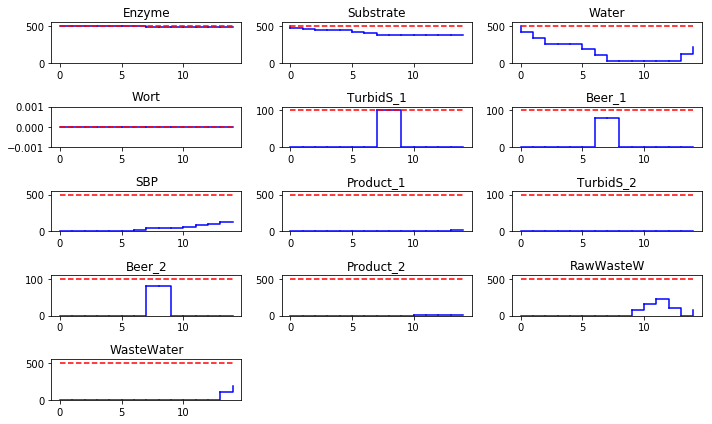

In [427]:
plt.figure(figsize=(10,6))
for (s,idx) in zip(STATES.keys(),range(0,len(STATES.keys()))):
    plt.subplot(ceil(len(STATES.keys())/3),3,idx+1)
    tlast,ylast = 0,STATES[s]['initial']
    for (t,y) in zip(list(TIME),[model.S[s,t]() for t in TIME]):
        plt.plot([tlast,t,t],[ylast,ylast,y],'b')
        #plt.plot([tlast,t],[ylast,y],'b.',ms=10)
        tlast,ylast = t,y
    plt.ylim(0,1.1*C[s])
    plt.plot([0,H],[C[s],C[s]],'r--')
    plt.title(s)
plt.tight_layout()

### Unit Assignment

In [428]:
UnitAssignment = pd.DataFrame({j:[None for t in TIME] for j in UNITS},index=TIME)

for t in TIME:
    for j in UNITS:
        for i in I[j]:
            for s in S_[i]:
                if t-p[i] >= 0:
                    if model.W[i,j,max(TIME[TIME <= t-p[i]])]() > 0:
                        UnitAssignment.loc[t,j] = None               
        for i in I[j]:
            if model.W[i,j,t]() > 0:
                UnitAssignment.loc[t,j] = (i,model.B[i,j,t]())

UnitAssignment

,Blender,Fermentor_1,Fermentor_2,Fermentor_3,Filter_1,Filter_2,MembraneS,RO_System
0,"(Digestion, 100.0)",None,None,None,None,None,None,None
1,"(Digestion, 100.0)",None,None,"(Fermentation_1, 100.0)",None,None,None,None
2,"(Digestion, 100.0)","(Fermentation_2, 100.0)",None,None,None,None,None,None
3,None,None,"(Fermentation_1, 100.0)",None,None,None,None,None
4,None,None,None,None,None,None,None,None
5,"(Digestion, 100.0)",None,None,None,"(Filtration_1, 100.0)",None,None,None
6,"(Digestion, 100.0)",None,None,"(Fermentation_2, 100.0)",None,"(Filtration_2, 100.0)",None,None
7,"(Digestion, 100.0)","(Fermentation_1, 100.0)",None,None,None,None,None,None
8,None,None,"(Fermentation_2, 100.0)",None,None,None,"(Separation_1, 80.0)",None
9,None,None,None,None,None,"(Filtration_1, 100.0)","(Separation_2, 80.0)",None


### Unit Batch Inventories

In [429]:
pd.DataFrame([[model.Q[j,t]() for j in UNITS] for t in TIME], columns = UNITS, index = TIME)

,Fermentor_2,Blender,Fermentor_1,Filter_2,Filter_1,Fermentor_3,RO_System,MembraneS
0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0
2,0.0,100.0,100.0,0.0,0.0,100.0,0.0,0.0
3,100.0,0.0,100.0,0.0,0.0,100.0,0.0,0.0
4,100.0,0.0,100.0,0.0,0.0,100.0,0.0,0.0
5,100.0,100.0,100.0,0.0,100.0,0.0,0.0,0.0
6,100.0,100.0,0.0,100.0,0.0,100.0,0.0,0.0
7,0.0,100.0,100.0,0.0,0.0,100.0,0.0,0.0
8,100.0,0.0,100.0,0.0,0.0,100.0,0.0,80.0
9,100.0,0.0,100.0,100.0,0.0,100.0,0.0,80.0


### Gannt Chart

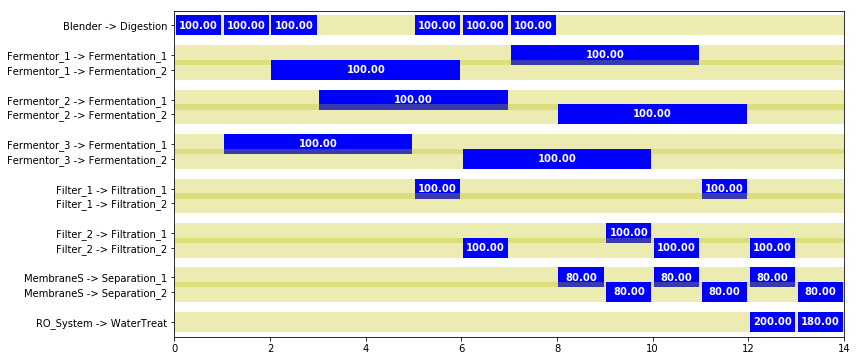

In [430]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

gap = H/500
idx = 1
lbls = []
ticks = []
for j in sorted(UNITS):
    idx -= 1
    for i in sorted(I[j]):
        idx -= 1
        ticks.append(idx)
        lbls.append("{0:s} -> {1:s}".format(j,i))
        plt.plot([0,H],[idx,idx],lw=20,alpha=.3,color='y')
        for t in TIME:
            if model.W[i,j,t]() > 0:
                plt.plot([t+gap,t+p[i]-gap], [idx,idx],'b', lw=20, solid_capstyle='butt')
                txt = "{0:.2f}".format(model.B[i,j,t]())
                plt.text(t+p[i]/2, idx, txt, color='white', weight='bold', ha='center', va='center')
plt.xlim(0,H)
plt.gca().set_yticks(ticks)
plt.gca().set_yticklabels(lbls);

## Trace of Events and States

In [431]:
sep = '\n--------------------------------------------------------------------------------------------\n'
print(sep)
print("Starting Conditions")
print("    Initial Inventories:")            
for s in STATES.keys():
        print("        {0:10s}  {1:6.1f} kg".format(s,STATES[s]['initial']))
        
units = {j:{'assignment':'None', 't':0} for j in UNITS}

for t in TIME:
    print(sep)
    print("Time =",t,"hr")
    print("    Instructions:")
    for j in UNITS:
        units[j]['t'] += 1
        # transfer from unit to states
        for i in I[j]:  
            for s in S_[i]:
                if t-P[(i,s)] >= 0:
                    amt = rho_[(i,s)]*model.B[i,j,max(TIME[TIME <= t - P[(i,s)]])]()
                    if amt > 0:
                        print("        Transfer", amt, "kg from", j, "to", s)
    for j in UNITS:
        # release units from tasks
        for i in I[j]:
            if t-p[i] >= 0:
                if model.W[i,j,max(TIME[TIME <= t-p[i]])]() > 0:
                    print("        Release", j, "from", i)
                    units[j]['assignment'] = 'None'
                    units[j]['t'] = 0
        # assign units to tasks             
        for i in I[j]:
            if model.W[i,j,t]() > 0:
                print("        Assign", j, "with capacity", Bmax[(i,j)], "kg to task",i,"for",p[i],"hours")
                units[j]['assignment'] = i
                units[j]['t'] = 1
        # transfer from states to starting tasks
        for i in I[j]:
            for s in S[i]:
                amt = rho[(i,s)]*model.B[i,j,t]()
                if amt > 0:
                    print("        Transfer", amt,"kg from", s, "to", j)
    print("\n    Inventories are now:")            
    for s in STATES.keys():
        print("        {0:10s}  {1:6.1f} kg".format(s,model.S[s,t]()))
    print("\n    Unit Assignments are now:")
    for j in UNITS:
        if units[j]['assignment'] != 'None':
            fmt = "        {0:s} performs the {1:s} task with a {2:.2f} kg batch for hour {3:d} of {4:d}"
            i = units[j]['assignment']
            print(fmt.format(j,i,model.Q[j,t](),units[j]['t'],p[i]))
            
print(sep)
print('Final Conditions')
print("    Final Inventories:")            
for s in STATES.keys():
        print("        {0:10s}  {1:6.1f} kg".format(s,model.S[s,H]()))



--------------------------------------------------------------------------------------------

Starting Conditions
    Initial Inventories:
        Enzyme       500.0 kg
        Substrate    500.0 kg
        Water        500.0 kg
        Wort           0.0 kg
        TurbidS_1      0.0 kg
        Beer_1         0.0 kg
        SBP            0.0 kg
        Product_1      0.0 kg
        TurbidS_2      0.0 kg
        Beer_2         0.0 kg
        Product_2      0.0 kg
        RawWasteW      0.0 kg
        WasteWater     0.0 kg

--------------------------------------------------------------------------------------------

Time = 0 hr
    Instructions:
        Assign Blender with capacity 100 kg to task Digestion for 1 hours
        Transfer 79.0 kg from Water to Blender
        Transfer 1.0 kg from Enzyme to Blender
        Transfer 20.0 kg from Substrate to Blender

    Inventories are now:
        Enzyme       499.0 kg
        Substrate    480.0 kg
        Water        421.0 kg
        Wo